In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stajveriler/stajverilertemiz/satislar_csv.csv
/kaggle/input/stajveriler/stajverilertemiz/iadeler_listesi.csv
/kaggle/input/stajveriler/stajverilertemiz/urun_yorumlari.csv
/kaggle/input/stajveriler/stajverilertemiz/amazon_kampanyalari_edali.csv
/kaggle/input/stajveriler/stajverilertemiz/diger_kampanyalar.csv
/kaggle/input/staj-veriler/Iadeler listesi.xlsx
/kaggle/input/staj-veriler/Diger kampanyalar.xlsx
/kaggle/input/staj-veriler/Urun yorumlari.xlsx
/kaggle/input/staj-veriler/Satislar.xlsx
/kaggle/input/staj-veriler/Amazon Kampanyalari.xlsx


In [2]:
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)

In [3]:
df = pd.read_excel('/kaggle/input/staj-veriler/Urun yorumlari.xlsx')

In [4]:
df.head()

,order_id,review_title,comments,rating,status,date_created,sku,Customer ID,address,product_sku,product_name,product_link,video_review_prompt_id,tags,reply,reply_private,reply_date,published_images,unpublished_images,published_videos,unpublished_videos,source,location,timeago,video_first_campaign
0,44840,NaN,Very happy with thisğŸ˜Š,5,active,2022-11-28 19:20:34,3108,C0000921,NaN,3108,Carina Collection Modern Washable Rugs in Pink...,https://www.the-rugs.com/washable-rugs/carina-...,199.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,woocom,NaN,NaN,NaN
1,44840,NaN,NaN,5,active,2022-11-28 19:20:34,18185,C0000921,NaN,18185,Muslera Collection Faux Fur Rugs in Light Grey...,https://www.the-rugs.com/bathroom-rugs/muslera...,199.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,woocom,NaN,NaN,NaN
2,47071,NaN,Quality meets expectation,5,active,2022-11-26 21:06:08,2199,C0001003,NaN,2199,Montana Collection Modern Rugs in Blue | 3762N...,https://www.the-rugs.com/modern-rugs/montana-c...,199.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,woocom,"Coventry, United Kingdom",NaN,NaN
3,44681,NaN,"Just as the picture, creases came out quite qu...",5,active,2022-11-25 14:51:50,2169,C0020878,NaN,2169,Montana Collection Modern Rugs in Cream | 3716...,https://www.the-rugs.com/vintage-rugs/montana-...,199.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,woocom,"Cardiff, United Kingdom",NaN,NaN
4,44836,NaN,Beautiful Rug!!,5,active,2022-11-25 14:22:34,2470,C0009678,NaN,2470,Rhapsody Collection Berber Design Shaggy Rugs ...,https://www.the-rugs.com/shaggy-rugs/rhapsody-...,199.0,NaN,NaN,NaN,NaN,https://s3-us-west-1.amazonaws.com/reviews-us-...,NaN,NaN,NaN,woocom,"Slough, United Kingdom",NaN,NaN


In [5]:
dropping = ['sku','address','tags','reply','reply_private','reply_date',
            'published_images','unpublished_images','published_images',
            'published_videos','unpublished_videos','timeago','video_first_campaign']

In [6]:
df.drop(dropping,axis=1,inplace=True)

In [7]:
df.rename(columns = {'Customer ID':'Customer_ID'},inplace = True)

In [8]:
df.head()

,order_id,review_title,comments,rating,status,date_created,Customer_ID,product_sku,product_name,product_link,video_review_prompt_id,source,location
0,44840,NaN,Very happy with thisğŸ˜Š,5,active,2022-11-28 19:20:34,C0000921,3108,Carina Collection Modern Washable Rugs in Pink...,https://www.the-rugs.com/washable-rugs/carina-...,199.0,woocom,NaN
1,44840,NaN,NaN,5,active,2022-11-28 19:20:34,C0000921,18185,Muslera Collection Faux Fur Rugs in Light Grey...,https://www.the-rugs.com/bathroom-rugs/muslera...,199.0,woocom,NaN
2,47071,NaN,Quality meets expectation,5,active,2022-11-26 21:06:08,C0001003,2199,Montana Collection Modern Rugs in Blue | 3762N...,https://www.the-rugs.com/modern-rugs/montana-c...,199.0,woocom,"Coventry, United Kingdom"
3,44681,NaN,"Just as the picture, creases came out quite qu...",5,active,2022-11-25 14:51:50,C0020878,2169,Montana Collection Modern Rugs in Cream | 3716...,https://www.the-rugs.com/vintage-rugs/montana-...,199.0,woocom,"Cardiff, United Kingdom"
4,44836,NaN,Beautiful Rug!!,5,active,2022-11-25 14:22:34,C0009678,2470,Rhapsody Collection Berber Design Shaggy Rugs ...,https://www.the-rugs.com/shaggy-rugs/rhapsody-...,199.0,woocom,"Slough, United Kingdom"


In [9]:
df.shape

(561, 13)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [11]:
df['comments'].values[0]

'Very happy with thisğŸ˜Š'

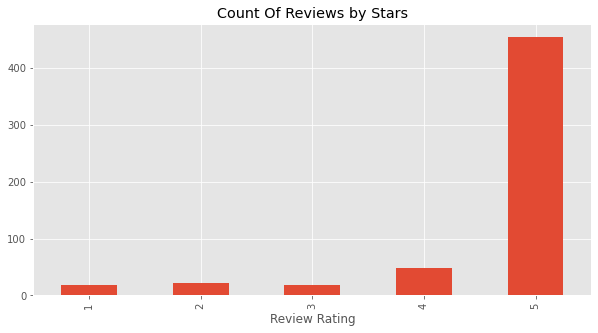

In [12]:
ax = df['rating'].value_counts().sort_index().plot(kind='bar',
                                              title='Count Of Reviews by Stars',
                                              figsize = (10,5))
ax.set_xlabel('Review Rating')
plt.show()

## Basic NLTK

In [13]:
example = df['comments'][50]
print(example)

Much better than I expected with the price being so reasonable. It is perfect for my sons bedroom, excellent size, exactly true to description. 


In [14]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Much',
 'better',
 'than',
 'I',
 'expected',
 'with',
 'the',
 'price',
 'being',
 'so']

In [15]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Much', 'RB'),
 ('better', 'JJR'),
 ('than', 'IN'),
 ('I', 'PRP'),
 ('expected', 'VBD'),
 ('with', 'IN'),
 ('the', 'DT'),
 ('price', 'NN'),
 ('being', 'VBG'),
 ('so', 'RB')]

In [16]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Much/RB
  better/JJR
  than/IN
  I/PRP
  expected/VBD
  with/IN
  the/DT
  price/NN
  being/VBG
  so/RB
  reasonable/JJ
  ./.
  It/PRP
  is/VBZ
  perfect/JJ
  for/IN
  my/PRP$
  sons/NNS
  bedroom/NN
  ,/,
  excellent/JJ
  size/NN
  ,/,
  exactly/RB
  true/JJ
  to/TO
  description/NN
  ./.)


## 1.Vader Sentiment Scoring

We use it to get neg/neu/pos scores of the text.
This uses 'bag of words' approach

1.Stop words are removed 


2.each word is scored and combined to a total score

In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [18]:
sia.polarity_scores(' I am so happy')

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

In [20]:
sia.polarity_scores('This is the worst thing ever')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [21]:
## Running the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    comments = row['comments']
    myid = row['Customer_ID']
    res[myid] = sia.polarity_scores(str(comments))

  0%|          | 0/561 [00:00<?, ?it/s]

In [22]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index':'Customer_ID'})
vaders = vaders.merge(df,how='left')

In [23]:
vaders.head()

,Customer_ID,neg,neu,pos,compound,order_id,review_title,comments,rating,status,date_created,product_sku,product_name,product_link,video_review_prompt_id,source,location
0,C0000921,0.0,1.000,0.000,0.0000,44840,NaN,Very happy with thisğŸ˜Š,5,active,2022-11-28 19:20:34,3108,Carina Collection Modern Washable Rugs in Pink...,https://www.the-rugs.com/washable-rugs/carina-...,199.0,woocom,NaN
1,C0000921,0.0,1.000,0.000,0.0000,44840,NaN,NaN,5,active,2022-11-28 19:20:34,18185,Muslera Collection Faux Fur Rugs in Light Grey...,https://www.the-rugs.com/bathroom-rugs/muslera...,199.0,woocom,NaN
2,C0001003,0.0,1.000,0.000,0.0000,47071,NaN,Quality meets expectation,5,active,2022-11-26 21:06:08,2199,Montana Collection Modern Rugs in Blue | 3762N...,https://www.the-rugs.com/modern-rugs/montana-c...,199.0,woocom,"Coventry, United Kingdom"
3,C0020878,0.0,1.000,0.000,0.0000,44681,NaN,"Just as the picture, creases came out quite qu...",5,active,2022-11-25 14:51:50,2169,Montana Collection Modern Rugs in Cream | 3716...,https://www.the-rugs.com/vintage-rugs/montana-...,199.0,woocom,"Cardiff, United Kingdom"
4,C0009678,0.0,0.182,0.818,0.6688,44836,NaN,Beautiful Rug!!,5,active,2022-11-25 14:22:34,2470,Rhapsody Collection Berber Design Shaggy Rugs ...,https://www.the-rugs.com/shaggy-rugs/rhapsody-...,199.0,woocom,"Slough, United Kingdom"


## Plot Vader Results

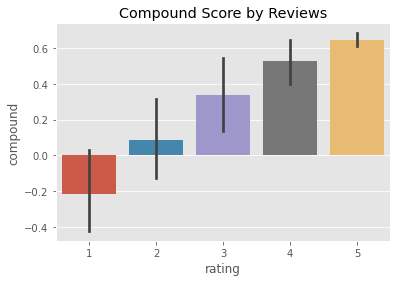

In [24]:
ax = sns.barplot(data=vaders, x = 'rating', y='compound')
ax.set_title('Compound Score by Reviews')
plt.show()

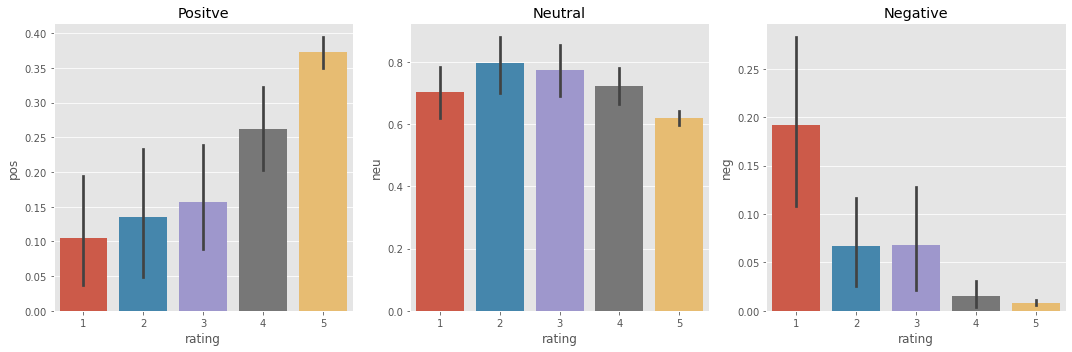

In [25]:
fig,axs = plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positve')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## 2.Roberta Pretrained Model

In [26]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [27]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

In [28]:
print(example)
sia.polarity_scores(example)

Much better than I expected with the price being so reasonable. It is perfect for my sons bedroom, excellent size, exactly true to description. 


{'neg': 0.0, 'neu': 0.592, 'pos': 0.408, 'compound': 0.9201}

In [31]:
## Run for Roberta Model

encoded_text = tokenizer(example,return_tensors = 'pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2],
}
print(scores_dict)

{'roberta_neg': 0.002394369, 'roberta_neu': 0.012446578, 'roberta_pos': 0.98515904}


In [32]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [33]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['comments']
        myid = row['Customer_ID']
        vader_result = sia.polarity_scores(str(text))
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(str(text))
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/561 [00:00<?, ?it/s]

In [34]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Customer_ID'})
results_df = results_df.merge(df, how='left')

In [35]:
results_df.columns

Index(['Customer_ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'order_id', 'review_title',
       'comments', 'rating', 'status', 'date_created', 'product_sku',
       'product_name', 'product_link', 'video_review_prompt_id', 'source',
       'location'],
      dtype='object')

## 3. Combine and compare

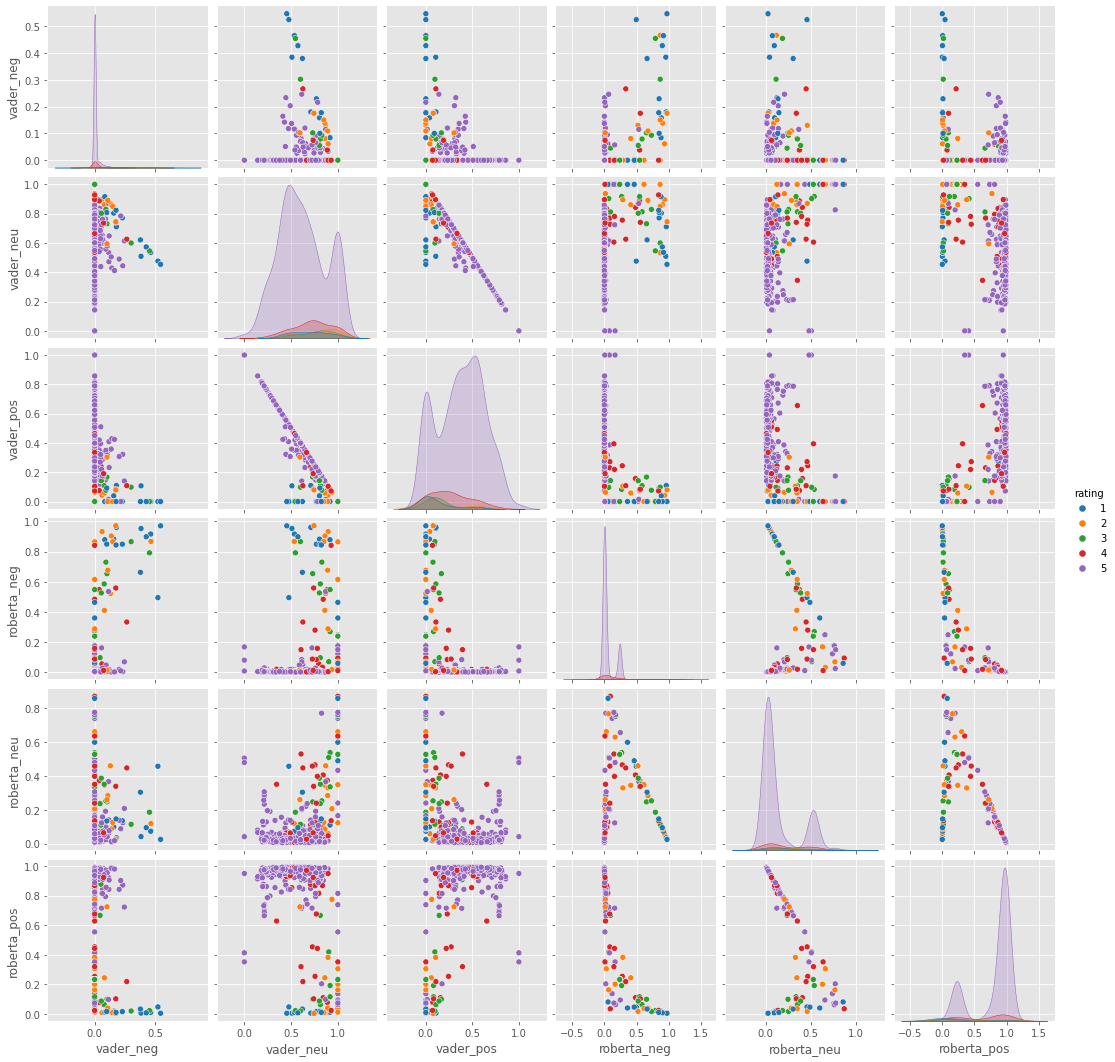

In [36]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='rating',
            palette='tab10')
plt.show()

## 4.Review Examples

In [37]:
## Positive Sentiment but 1 rating

In [38]:
results_df.query('rating == 1') \
    .sort_values('roberta_pos', ascending=False)['comments'].values[0]

'Cheap looking, dodnt look like in the picture '

In [53]:
results_df.query('rating == 1') \
    .sort_values('vader_pos', ascending=False)['comments'].values[0]

'Cheap looking, dodnt look like in the picture '

In [54]:
## Negative Sentiment 5 star rating

In [55]:
results_df.query('rating == 5') \
    .sort_values('roberta_neg', ascending=False)['comments'].values[0]

"I bought this to sit under my desk at home, to protect the carpet from the chair, but I've now been evicted by my indoor bunnies who have decided the rug is the comfiest thing ever. They abandoned the sleeping corner they've used for years, and have claimed my desk as their own. I'm having to order another one that's all theirs, so I can steal my desk back._x000D_\n_x000D_\nFor the non-bunny owners out there though, I'd say it's decent rug for a kitchen/pet room, but I'd probably not recommend as a feature rug for a living room. I've also not tried washing it yet, so can't say how well it washes."

In [56]:
results_df.query('rating == 5') \
    .sort_values('vader_neg', ascending=False)['comments'].values[0]

'Looks great, no need for anti slip mat underneath. Will have trouble getting it in washing machine, should have got smaller one '

## 5.The Transformers Pipeline

In [39]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

2023-02-03 13:37:39.503108: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [40]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [41]:
sent_pipeline('Make sure to like and subscribe!')

[{'label': 'POSITIVE', 'score': 0.9991742968559265}]